# Clustering

## K-Means

### CSV file

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [4]:
def fillMissingData(X, column):
    from sklearn.impute import SimpleImputer
    imputer = SimpleImputer(missing_values=np.nan, strategy='median')
    X[:,column:column + 1] = imputer.fit_transform(X[:,column:column + 1])
    return X

In [5]:
df = pd.read_csv('svbr_en.csv', delimiter=';')
df.head()

,Channel,Subscribers,Views
0,Site Arqueologia Egípcia,13438.0,406590
1,Terra Negra,35241.0,868235
2,Frank Jaava,31680.0,2856508
3,Dispersciência,25100.0,150000
4,Olá Ciência,32788.0,1575456


In [6]:
#pre-processing
df_numpy = fillMissingData(df.to_numpy(), 1)
df_numpy[:, 1] = df_numpy[:, 1].astype("int")
df_numpy = fillMissingData(df_numpy, 2)
df_numpy[:, 2] = df_numpy[:, 2].astype("int")

#updating peixe babel
df.at[28, 'Subscribers'] = df_numpy[28][1]
df.at[28, 'Views'] = df_numpy[28][2]

#convert subscribers and views to int
df.Subscribers = df.Subscribers.astype("int")
df.Views = df.Views.astype("int")
X = pd.DataFrame({'Subscribers': df_numpy[:, 1], 'Views': df_numpy[:, 2]})
X.head()

,Subscribers,Views
0,13438,406590
1,35241,868235
2,31680,2856508
3,25100,150000
4,32788,1575456


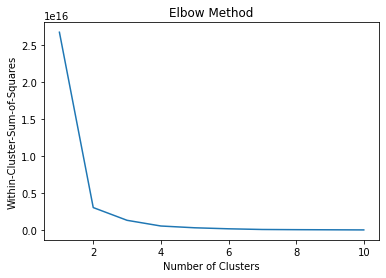

In [7]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Within-Cluster-Sum-of-Squares")
plt.show()

#### K = 2

In [8]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10)
clusters = kmeans.fit_predict(X)
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0], dtype=int32)

In [9]:
df['Cluster'] = clusters

In [10]:
boolArray = df['Cluster'] == 0
df[boolArray] 

,Channel,Subscribers,Views,Cluster
0,Site Arqueologia Egípcia,13438,406590,0
1,Terra Negra,35241,868235,0
2,Frank Jaava,31680,2856508,0
3,Dispersciência,25100,150000,0
4,Olá Ciência,32788,1575456,0
5,A matemaníaca por Julia Jaccoud,65453,1667892,0
6,Delta T - Os super lentos,12000,171361,0
7,Bláblálogia,161951,11027386,0
8,Efarsas,78876,6226235,0
9,Minuto da Terra,274196,30166457,0


In [11]:
boolArray = df['Cluster'] == 1
df[boolArray]

,Channel,Subscribers,Views,Cluster
18,Matemática Rio com Prof Rafael Procópio,1423056,93036517,1
32,Canal do Pirula,752573,76462787,1
39,Schwarza - Poligonautas,860493,118741623,1


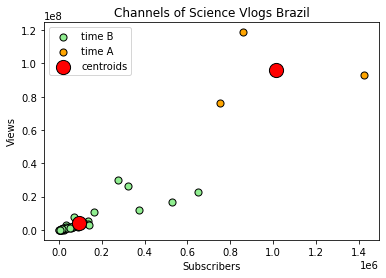

In [12]:
x = X.to_numpy()

plt.scatter(
    x[clusters == 0, 0], x[clusters == 0, 1],
    s=50, c='lightgreen',
    edgecolor='black',
    label='time B'
)

plt.scatter(
    x[clusters == 1, 0], x[clusters == 1, 1],
    s=50, c='orange',
    edgecolor='black',
    label='time A'
)

# plot the centroids
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    s=200, c='red', edgecolor='black',
    label='centroids'
)
plt.title("Channels of Science Vlogs Brazil")
plt.xlabel("Subscribers")
plt.ylabel("Views")

plt.legend()
plt.show()

#### K = 3

In [13]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10)
clusters = kmeans.fit_predict(X)

df['Cluster'] = clusters
df.head()

,Channel,Subscribers,Views,Cluster
0,Site Arqueologia Egípcia,13438,406590,1
1,Terra Negra,35241,868235,1
2,Frank Jaava,31680,2856508,1
3,Dispersciência,25100,150000,1
4,Olá Ciência,32788,1575456,1


In [14]:
boolArray = df['Cluster'] == 1
df[boolArray]

,Channel,Subscribers,Views,Cluster
0,Site Arqueologia Egípcia,13438,406590,1
1,Terra Negra,35241,868235,1
2,Frank Jaava,31680,2856508,1
3,Dispersciência,25100,150000,1
4,Olá Ciência,32788,1575456,1
5,A matemaníaca por Julia Jaccoud,65453,1667892,1
6,Delta T - Os super lentos,12000,171361,1
7,Bláblálogia,161951,11027386,1
8,Efarsas,78876,6226235,1
10,Canal Cura Quântica,13148,250020,1


In [15]:
boolArray = df['Cluster'] == 2
df[boolArray]

,Channel,Subscribers,Views,Cluster
18,Matemática Rio com Prof Rafael Procópio,1423056,93036517,2
32,Canal do Pirula,752573,76462787,2
39,Schwarza - Poligonautas,860493,118741623,2


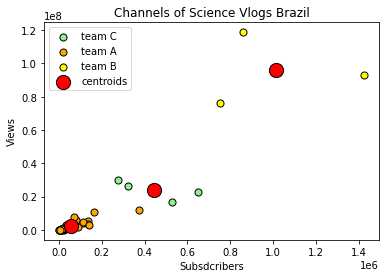

In [16]:
x = X.to_numpy()

plt.scatter(
    x[clusters == 0, 0], x[clusters == 0, 1],
    s=50, c='lightgreen',
    edgecolor='black',
    label='team C'
)

plt.scatter(
    x[clusters == 1, 0], x[clusters == 1, 1],
    s=50, c='orange',
    edgecolor='black',
    label='team A'
)

plt.scatter(
    x[clusters == 2, 0], x[clusters == 2, 1],
    s=50, c='yellow',
    edgecolor='black',
    label='team B'
)

# plot the centroids
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    s=200, c='red', edgecolor='black',
    label='centroids'
)

plt.title("Channels of Science Vlogs Brazil")
plt.xlabel("Subsdcribers")
plt.ylabel("Views")

plt.legend()
plt.show()

### K-Means using blobs dataset

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [18]:
X, y = make_blobs(
   n_samples=150, n_features=2,
   centers=4, cluster_std=0.2,
   shuffle=True)

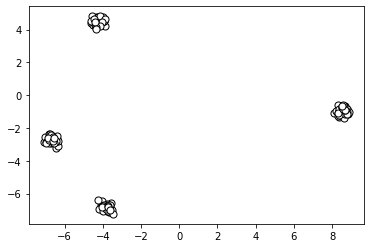

In [19]:
plt.scatter(
   X[:, 0], X[:, 1],
   c='white', marker='o',
   edgecolor='black', s=50)

plt.show()

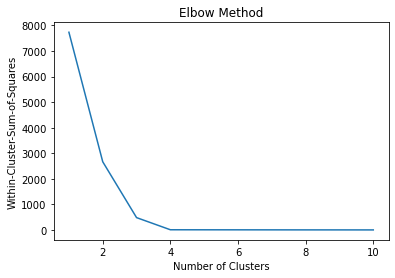

In [20]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Within-Cluster-Sum-of-Squares")
plt.show()

In [21]:
kmeans = KMeans(
    n_clusters=4, init='k-means++',
    n_init=10, max_iter=300
)

clusters = kmeans.fit_predict(X)

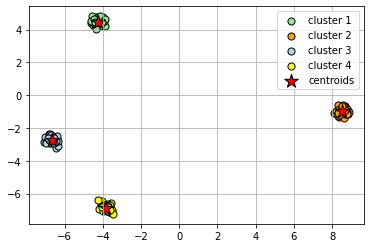

In [22]:
plt.scatter(
    X[clusters == 0, 0], X[clusters == 0, 1],
    s=50, c='lightgreen',
    edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[clusters == 1, 0], X[clusters == 1, 1],
    s=50, c='orange',
    edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[clusters == 2, 0], X[clusters == 2, 1],
    s=50, c='lightblue',
    edgecolor='black',
    label='cluster 3'
)

plt.scatter(
    X[clusters == 3, 0], X[clusters == 3, 1],
    s=50, c='yellow',
    edgecolor='black',
    label='cluster 4'
)

# plot the centroids
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    s=200, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend()
plt.grid()
plt.show()

References:

1. https://towardsdatascience.com/k-means-clustering-with-scikit-learn-6b47a369a83c

## Hierarchical Clustering

### Dendrograma

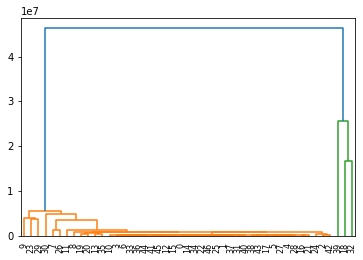

In [23]:
from scipy.cluster.hierarchy import dendrogram, linkage

#linkage performs hierarchical clustering in order to build a dendrogram
dendrogram(linkage(x))
plt.show()

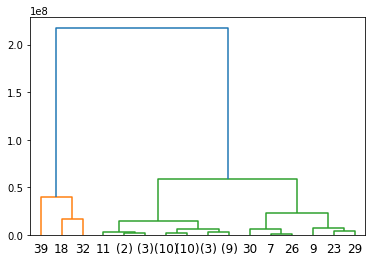

In [24]:
dendrogram(linkage(x, 'ward'), truncate_mode='level', p=4)
plt.show()

#### Hierarchical Clustering Algorithm

In [25]:
from sklearn.cluster import AgglomerativeClustering

hc_model = AgglomerativeClustering(affinity='euclidean', linkage='ward')
clusters = hc_model.fit_predict(x)

df['Cluster'] = clusters
df.head()

,Channel,Subscribers,Views,Cluster
0,Site Arqueologia Egípcia,13438,406590,0
1,Terra Negra,35241,868235,0
2,Frank Jaava,31680,2856508,0
3,Dispersciência,25100,150000,0
4,Olá Ciência,32788,1575456,0


In [26]:
boolArray = df['Cluster'] == 1
df[boolArray]

,Channel,Subscribers,Views,Cluster
18,Matemática Rio com Prof Rafael Procópio,1423056,93036517,1
32,Canal do Pirula,752573,76462787,1
39,Schwarza - Poligonautas,860493,118741623,1


In [27]:
hc_model

AgglomerativeClustering()

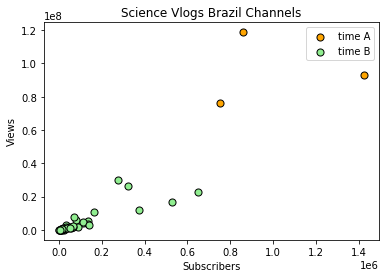

In [30]:
plt.scatter(
    x[clusters == 1, 0], x[clusters == 1, 1],
    s=50, c='orange',
    edgecolor='black',
    label='time A'
)

plt.scatter(
    x[clusters == 0, 0], x[clusters == 0, 1],
    s=50, c='lightgreen',
    edgecolor='black',
    label='time B'
)

plt.title("Science Vlogs Brazil Channels")
plt.xlabel("Subscribers")
plt.ylabel("Views")

plt.legend()
plt.show()

https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html

https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering

https://towardsdatascience.com/hierarchical-clustering-explained-e58d2f936323

https://pythonprogramming.net/hierarchical-clustering-machine-learning-python-scikit-learn/

https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/